In [25]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [3]:
## Pull in clock data
MPIranks = np.array([2, 4, 6, 2, 4])
ORanks = np.array([1, 1, 1, 2, 4])
ns_day = np.array([36.806, 44.162, 91.243, 62.932, 149.577])
## Notes
# Only need 1 gig

Text(0.5, 1.0, 'Scaling plot')

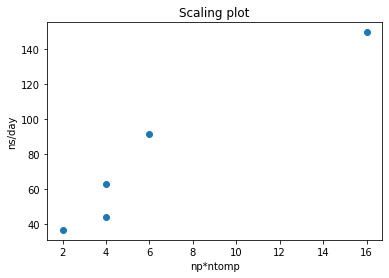

In [4]:
CPU_need = ORanks*MPIranks

plt.scatter(CPU_need, ns_day)
plt.xlabel('np*ntomp')
plt.ylabel('ns/day')
plt.title('Scaling plot')

## Let's use 6,1

In [14]:
## Pull in txt datas
T_test = np.loadtxt('T_test.xvg', skiprows=23)
P_test = np.loadtxt('P_test.xvg', skiprows=23)
T_500= np.loadtxt('500_T.xvg', skiprows=23)
P_500= np.loadtxt('500_P.xvg', skiprows=23)
D_500= np.loadtxt('500_D.xvg', skiprows=23)
R_500= np.loadtxt('500_R.xvg', skiprows=23)
T_273= np.loadtxt('273_T.xvg', skiprows=23)
P_273= np.loadtxt('273_P.xvg', skiprows=23)
D_273= np.loadtxt('273_D.xvg', skiprows=23)
R_273= np.loadtxt('273_R.xvg', skiprows=23)

In [15]:
## Plot the results

Text(0.5, 1.0, 'Pressure during NPT equilibrium step')

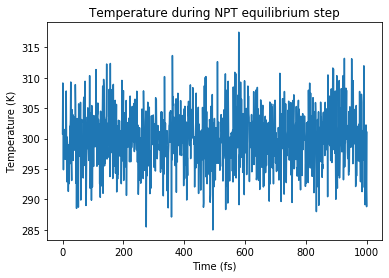

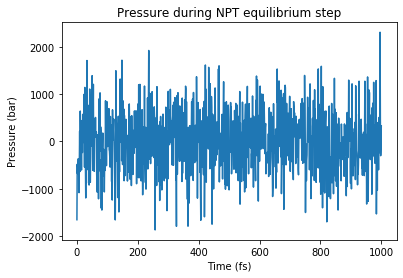

In [20]:
## Eq. test temperature and pressure

plt.figure()
plt.plot(T_test[:,0], T_test[:,1])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during NPT equilibrium step')

plt.figure()
plt.plot(P_test[:,0], P_test[:,1])
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.title('Pressure during NPT equilibrium step')

Both temperature and pressure oscilate about their respective desired values which is indicative of equilibrium... but the vary greatly between steps. Fluctuating thousands of bar for instance does not make sense. Clearly there is something off a with the simulation parameters that I gave it in the mdp file, maybe the cuttoff is being calculated wrong because forces between molecules are not very continuous. Cannot figure out what it is, though.

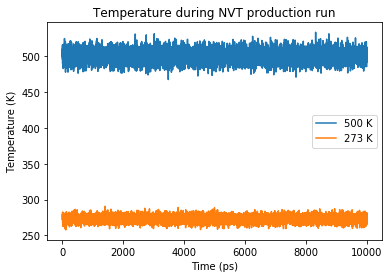

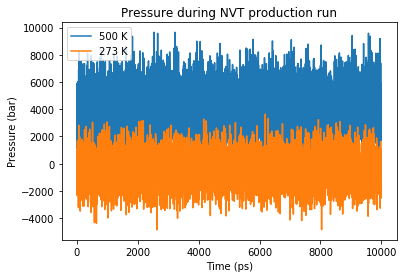

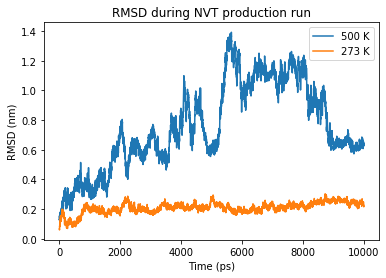

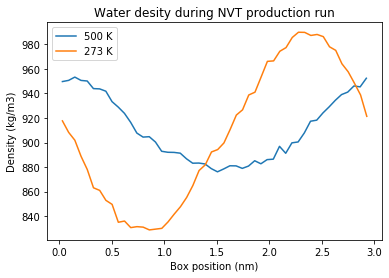

In [23]:
## For the NVT production run

#Temperature vs time
plt.figure()
plt.plot(T_500[:,0], T_500[:,1], label='500 K')
plt.plot(T_273[:,0], T_273[:,1], label='273 K')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during NVT production run')
plt.legend()

#Pressure vs time
plt.figure()
plt.plot(P_500[:,0], P_500[:,1], label='500 K')
plt.plot(P_273[:,0], P_273[:,1], label='273 K')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.title('Pressure during NVT production run')
plt.legend()

#RMSD vs time
plt.figure()
plt.plot(R_500[:,0], R_500[:,1], label='500 K')
plt.plot(R_273[:,0], R_273[:,1], label='273 K')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (nm)')
plt.title('RMSD during NVT production run')
plt.legend()

#Water density across the box
plt.figure()
plt.plot(D_500[:,0], D_500[:,1], label='500 K')
plt.plot(D_273[:,0], D_273[:,1], label='273 K')
plt.xlabel('Box position (nm)')
plt.ylabel('Density (kg/m3)')
plt.title('Water desity during NVT production run')
plt.legend()

I don't realy know how to comment on the results of pressure. It is fairly significantly negative in the 273K run, which is not feasible. It again must come down to the forces being calculated improperly, where the overall forces at that temperature are inward towards eachother away from the box edge. But a negative pressure is not possible.

It makes sense that RMSD would be changing/getting bigger at a faster rate in the 500K run, as it has more energy to move around. But it should stabalize at some point, maybe that is what we are seeing at about 9 ns.

For water density, I expect the valley to represent where the protein is (where there cannot be much water), let's see if this is true on the VMD of the simulation.

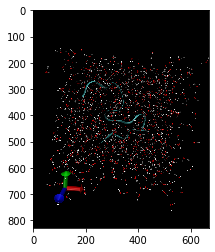

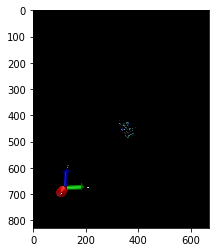

In [29]:
rend_500 = mpimg.imread('500.tga') 
rend_273 = mpimg.imread('273.tga') 
plt.figure()
plt.imshow(rend_500)
plt.figure()
plt.imshow(rend_273)

The box is clearly much much smaller in the run at 273K, which makes sense as it it was previously equilibrated with NPT, and the volume would be much smaller in that simulation for a smaller temperature

## Overall

I clearly did not run the correct parameters for this simulation set as seen by nonsensicle results. I need to spend some time intuiting the different options that gromacs has as well as what they mean if I am to use it to get usful information.